# Dataset characterization

Let's have a look at this dataset.

In [15]:
import pandas as pd
import numpy as np
from openff.toolkit.topology import Molecule
from rdkit.Chem import ResonanceMolSupplier, rdMolDescriptors
from rdkit import Chem

In [2]:
SMIFILE = "openff_parsley_benchmark.smi"

## Dataframe

In [77]:
from openeye.oechem import *
from openeye.oemolprop import (OEGetRotatableBondCount,
                               OEGetAromaticRingCount,
                               OEGetHBondAcceptorCount,
                               OEGetHBondDonorCount,
                              )

with open(SMIFILE, "r") as f:
    smiles = [x.strip() for x in f.readlines()]
    
dct = {x: [] for x in ["n_atoms", "n_heavy_atoms",
                       "n_rings (Euler)",
#                        "n_conjugated_groups",
#                        "n_aliphatic_rings",
                       "n_aromatic_rings",
#                        "n_rings",
                       "n_rotatable_bonds",
#                        "n_heterocycles",
#                        "n_stereocenters",
                       "n_hba",
                       "n_hbd",
                      ]}
dct["SMILES"] = smiles
elements = set()

for i, smi in enumerate(smiles):
    mol = Molecule.from_smiles(smi, allow_undefined_stereo=True)
    dct["n_atoms"].append(mol.n_atoms)
    heavy = [atom.element.symbol for atom in mol.atoms
             if atom.atomic_number != 1]
    dct["n_heavy_atoms"].append(len(heavy))
    
    oemol = mol.to_openeye()
    num_components, component_membership = OEDetermineComponents(oemol)
    num_rings = oemol.NumBonds() - oemol.NumAtoms() + num_components
    dct["n_rings (Euler)"].append(num_rings)
    dct["n_rotatable_bonds"].append(OEGetRotatableBondCount(oemol))
    dct["n_aromatic_rings"].append(OEGetAromaticRingCount(oemol))
    dct["n_hba"].append(OEGetHBondAcceptorCount(oemol))
    dct["n_hbd"].append(OEGetHBondDonorCount(oemol))
    
    # some invalid molecules here
#     rdmol = Chem.MolFromSmiles(smi)
#     if not rdmol:
#         print(smi)
#     suppl = ResonanceMolSupplier(rdmol)
#     dct["n_conjugated_groups"].append(suppl.GetNumConjGrps())
#     dct["n_aliphatic_rings"].append(rdMolDescriptors.CalcNumAliphaticRings(rdmol))
#     dct["n_aromatic_rings"].append(rdMolDescriptors.CalcNumAromaticRings(rdmol))
#     dct["n_rings"].append(rdMolDescriptors.CalcNumRings(rdmol))
#     dct["n_rotatable_bonds"].append(rdMolDescriptors.CalcNumRotatableBonds(rdmol))
#     dct["n_heterocycles"].append(rdMolDescriptors.CalcNumHeterocycles(rdmol))
#     dct["n_stereocenters"].append(rdMolDescriptors.CalcNumAtomStereoCenters(rdmol))
    

    # elements
    el, counts = np.unique(heavy, return_counts=True)
    el_set = set(el)
    for z, n in zip(el, counts):
        if z not in elements:
            dct[z] = [0] * i
            elements.add(z)
        dct[z].append(n)
    for z in elements - el_set:
        dct[z].append(0)
            
df = pd.DataFrame(dct)
df

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic bonds are: [<openeye.oechem.OEBondBase; proxy of <Swig Object of type 'OEChem::OEBondBase *' at 0x16f27fbd0> >]

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 14, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 13, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 15, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 16, name: , idx: 16, aromatic: False, chiral: False

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 3, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: Fa

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 16, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 15, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 17, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 21, aromatic: True, chiral: False

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 1, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 0, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 6, aromatic: True, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 2, ar

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 13, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 12, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 14, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 15, aromatic: True, chiral: False

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 7, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 5, aromatic: True, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 11, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 8, a

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 6, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 3, aromatic: True, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 17, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 7, aromatic: False, chiral: False

Warning (not error because allow_undefined_stereo=True): OEMol has unspecified stereochemistry. oemol.GetTitle(): 
Problematic atoms are:
Atom atomic num: 7, name: , idx: 6, aromatic: False, chiral: True with bonds:
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 3, aromatic: True, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 17, aromatic: False, chiral: False
bond order: 1, chiral: False to atom atomic num: 6, name: , idx: 7, arom

,n_atoms,n_heavy_atoms,n_rings (Euler),n_aromatic_rings,n_rotatable_bonds,n_hba,n_hbd,SMILES,C,N,O,Cl,F,S,P,Br,I
0,31,16,2,1,2,1,1,C#CCNC(=O)c1ccc2c(c1)CCCC2,14,1,1,0,0,0,0,0,0
1,26,13,2,1,2,1,1,C#CCN[C@@H]1CCc2c1cccc2,12,1,0,0,0,0,0,0,0
2,27,13,2,1,2,0,2,C#CC[NH2+][C@@H]1CCc2c1cccc2,12,1,0,0,0,0,0,0,0
3,37,21,3,2,1,1,1,C#Cc1cccc(c1)NC(=O)N2CCc3ccccc3C2,18,2,1,0,0,0,0,0,0
4,27,19,2,2,2,2,1,C#Cc1cccc(c1)NC(=O)c2cc(c(nc2)Cl)Cl,14,2,1,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4062,35,24,3,1,4,7,4,c1nc2c(nc(nc2n1[C@H]3[C@H]([C@@H]([C@H](O3)CO[...,10,5,7,0,1,0,1,0,0
4063,36,24,3,1,4,7,5,c1nc2c(nc(nc2n1[C@H]3[C@H]([C@@H]([C@H](O3)CO[...,10,5,7,0,1,0,1,0,0
4064,21,11,2,1,1,3,0,c1ncnc(n1)N2CCCC2,7,4,0,0,0,0,0,0,0
4065,36,19,3,0,2,2,1,c1nncn1CC(=O)N2CC[C@@]3(C2)CCCNC3=O,12,5,2,0,0,0,0,0,0


In [78]:
tidy = df.melt(id_vars=["SMILES"], value_name="Value", var_name="Property")
tidy

,SMILES,Property,Value
0,C#CCNC(=O)c1ccc2c(c1)CCCC2,n_atoms,31
1,C#CCN[C@@H]1CCc2c1cccc2,n_atoms,26
2,C#CC[NH2+][C@@H]1CCc2c1cccc2,n_atoms,27
3,C#Cc1cccc(c1)NC(=O)N2CCc3ccccc3C2,n_atoms,37
4,C#Cc1cccc(c1)NC(=O)c2cc(c(nc2)Cl)Cl,n_atoms,27
...,...,...,...
65067,c1nc2c(nc(nc2n1[C@H]3[C@H]([C@@H]([C@H](O3)CO[...,I,0
65068,c1nc2c(nc(nc2n1[C@H]3[C@H]([C@@H]([C@H](O3)CO[...,I,0
65069,c1ncnc(n1)N2CCCC2,I,0
65070,c1nncn1CC(=O)N2CC[C@@]3(C2)CCCNC3=O,I,0


In [88]:
df.to_csv("01_parsley_benchmark_properties.csv")

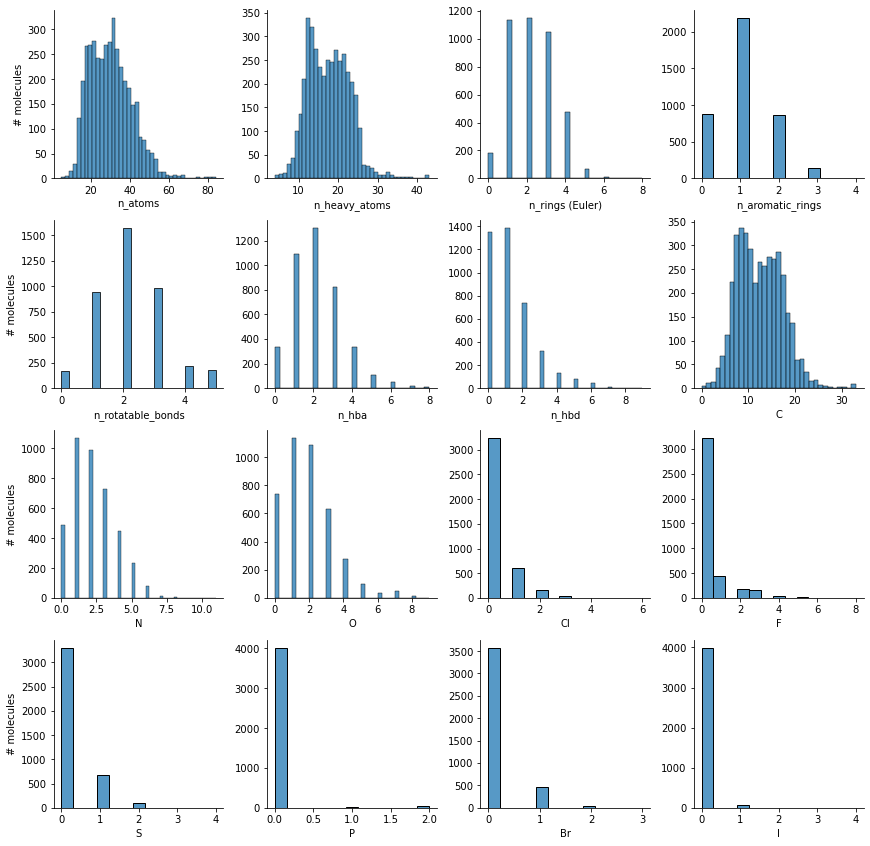

In [89]:
import seaborn as sns

g = sns.FacetGrid(data=tidy, col="Property", col_wrap=4, sharex=False, sharey=False)
g.map(sns.histplot, "Value", kde=False)
for i, (ax, title) in enumerate(zip(g.axes.flat, tidy.Property.unique())):
    ax.set_xlabel(title)
    if not i % 4:
        ax.set_ylabel("# molecules")
g.set_titles(col_template="")
g.savefig("01_parsley_benchmark_properties.png", dpi=300)